In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [24]:
df = pd.read_csv(os.path.join("../../nbasalarystats.csv"))
df.head()

,Rk,Player,Salary,Pos,Age,Tm,G,GS,MP,FG,...,BLK,TOV,PF,PTS,PTS/GM,REB/GM,AST/GM,STL/GM,BLK/GM,SHT%
0,120,Stephen Curry,34682550.0,PG,29,GSW,51,51,1631,428,...,8,153,114,1346,26.392157,5.117647,6.078431,1.568627,0.156863,0.495
1,248,LeBron James,33285709.0,PF,33,CLE,82,82,3026,857,...,71,347,136,2251,27.451220,8.646341,9.109756,1.414634,0.865854,0.542
2,341,Paul Millsap,31269231.0,PF,32,DEN,38,37,1143,202,...,44,73,99,555,14.605263,6.447368,2.763158,1.026316,1.157895,0.464
3,207,Gordon Hayward,29727900.0,SF,27,BOS,1,1,5,1,...,0,0,1,2,2.000000,1.000000,0.000000,0.000000,0.000000,0.500
4,191,Blake Griffin,29512900.0,PF,28,TOT,58,58,1970,436,...,18,165,139,1242,21.413793,7.379310,5.758621,0.706897,0.310345,0.438


In [25]:
df_nba = df[["Player", "Salary", "PTS/GM", "REB/GM", "AST/GM", "STL/GM", "BLK/GM", "SHT%"]]
df_nba = df_nba.dropna()
df_nba.head(30)

,Player,Salary,PTS/GM,REB/GM,AST/GM,STL/GM,BLK/GM,SHT%
0,Stephen Curry,34682550.0,26.392157,5.117647,6.078431,1.568627,0.156863,0.495
1,LeBron James,33285709.0,27.451220,8.646341,9.109756,1.414634,0.865854,0.542
2,Paul Millsap,31269231.0,14.605263,6.447368,2.763158,1.026316,1.157895,0.464
3,Gordon Hayward,29727900.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.500
4,Blake Griffin,29512900.0,21.413793,7.379310,5.758621,0.706897,0.310345,0.438
5,Kyle Lowry,28703704.0,16.243590,5.564103,6.884615,1.089744,0.243590,0.427
6,Mike Conley,28530608.0,17.083333,2.250000,4.083333,1.000000,0.250000,0.381
7,Russell Westbrook,28530608.0,25.350000,10.050000,10.250000,1.837500,0.250000,0.449
8,James Harden,28299399.0,30.430556,5.402778,8.750000,1.750000,0.694444,0.449
9,DeMar DeRozan,27739975.0,23.000000,3.937500,5.212500,1.062500,0.275000,0.456


In [26]:
X = df_nba[["PTS/GM", "REB/GM", "AST/GM", "STL/GM", "BLK/GM", "SHT%"]]
y = df_nba["Salary"].values.reshape(-1, 1)
print(X.shape, y.shape)

(332, 6) (332, 1)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.3609957146966915
Testing Score: 0.21392853840854387


Text(0.5,1,'Residual Plot')

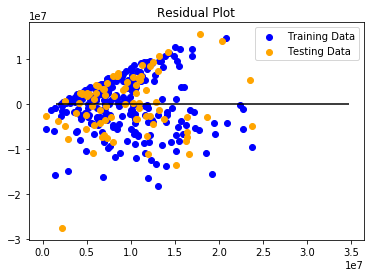

In [30]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 43717406105605.42
R-squared (R2 ): 0.21392853840854387


In [32]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[ 502623.63545748  654196.59871454  493675.14812515 -675848.19863109
   229811.73247546  317614.64459739]]
y-axis intercept:  [417585.78203292]
